In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
x_train.dtype

dtype('uint8')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# one hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
x_train_scaled.mean()

5.1098400794094047e-14

In [7]:
x_train_scaled.std()

0.956316274213992

In [8]:
x_test_scaled.std()

0.9570683370942685

In [9]:
x_train_scaled.shape

(60000, 784)

In [10]:
from tensorflow.keras.layers import Dense

In [18]:
# 定义网络
model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer='l2', input_shape=(784,)))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
# 一般不会在输出层加正则
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 配置
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
# 从训练过程可以观察, 使用了标准化处理的数据, 更快收敛. 
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test))

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.7969 - acc: 0.9110 - val_loss: 0.4054 - val_acc: 0.9416
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3772 - acc: 0.9444 - val_loss: 0.3536 - val_acc: 0.9490
Epoch 3/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3419 - acc: 0.9503 - val_loss: 0.3424 - val_acc: 0.9499
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3233 - acc: 0.9520 - val_loss: 0.3206 - val_acc: 0.9529
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3088 - acc: 0.9531 - val_loss: 0.3109 - val_acc: 0.9559
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2945 - acc: 0.9554 - val_loss: 0.2972 - val_acc: 0.9542
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2839 - acc: 0.9581 - val_loss: 0.2927 - val_acc: 0.9568
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.

In [15]:
history.history

{'loss': [0.796917200088501,
  0.3771592080593109,
  0.34191328287124634,
  0.3232516050338745,
  0.3087698221206665,
  0.2945108115673065,
  0.28385284543037415,
  0.27853670716285706,
  0.27112072706222534,
  0.2648954391479492,
  0.26466435194015503,
  0.2563028931617737,
  0.25485557317733765,
  0.25415146350860596,
  0.24833570420742035,
  0.25017744302749634,
  0.2458113431930542,
  0.2446441352367401,
  0.24117164313793182,
  0.2443465143442154],
 'acc': [0.9110333323478699,
  0.9443666934967041,
  0.9502666592597961,
  0.9519500136375427,
  0.953083336353302,
  0.9554166793823242,
  0.958133339881897,
  0.9574666619300842,
  0.9588500261306763,
  0.9591166377067566,
  0.9583666920661926,
  0.9609500169754028,
  0.9595666527748108,
  0.9606833457946777,
  0.9615499973297119,
  0.9606500267982483,
  0.9610666632652283,
  0.9612833261489868,
  0.9616666436195374,
  0.961566686630249],
 'val_loss': [0.4053933918476105,
  0.3536091446876526,
  0.34244808554649353,
  0.32057574391365

In [16]:
import pandas as pd

<AxesSubplot:>

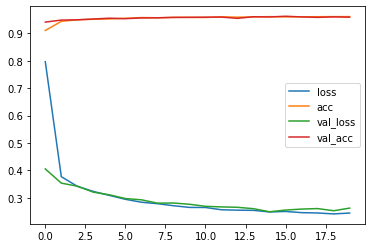

In [17]:
pd.DataFrame(history.history).plot()